# Excercise 2a: Exploratory Data Analysis

In [163]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [165]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

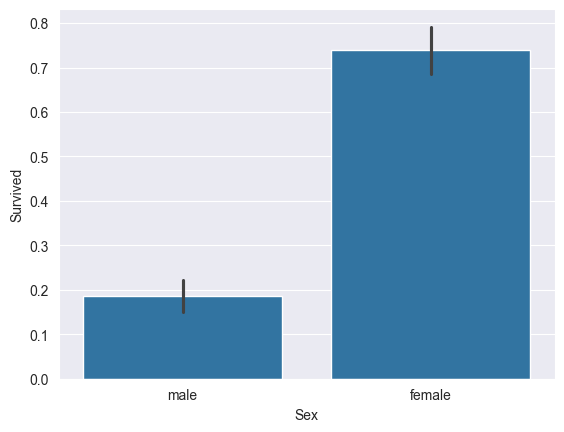

In [166]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, first-class passengers had higher survival rate.

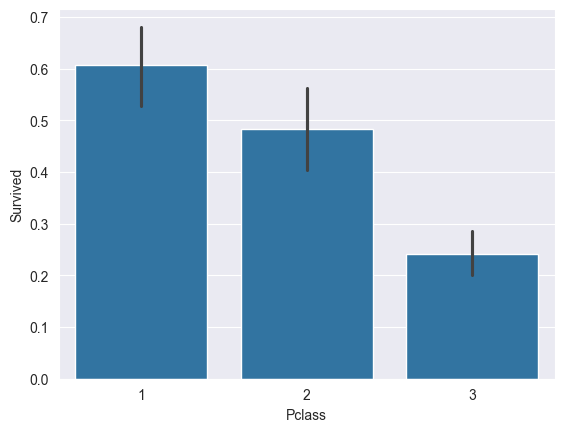

In [167]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: In one way you could say that survival is related to 'Embarked', based on that the survival rate for C (Cherbourg) is over 0.5, while the others are at 0.3. However, there is worth noting that we are dealing with unbalanced data because there are many more people represented embarked from S (Southampton) and fewer people represented from Q (Queenstown). But also, the majority of the people embarked from Southampton and Queenstown was in Pclass 3 (third class), while near 50% of people embarked from Cherbourg was in first class. Based on this, we get some demographic intel which further highlights that survival related to 'Embarked' is to some degree true.

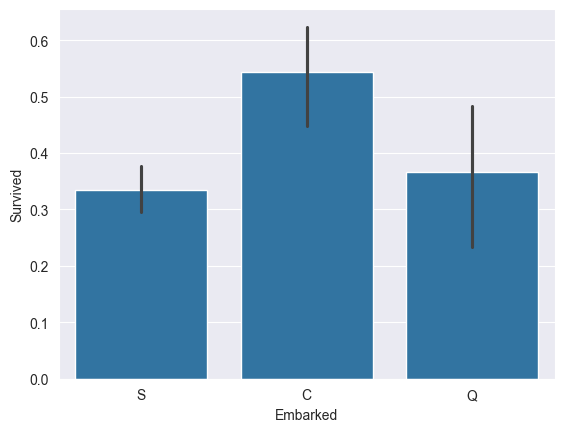

---------------------------------------------
Survived  Died  Survived
Embarked                
C           57        68
Q           38        22
S          349       176
---------------------------------------------
Embarked  Cherbourg  Queenstown  Southampton
Pclass                                      
1                57           2          102
2                16           3          132
3                52          55          291


In [168]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()
print('-'*45)
ct = pd.crosstab(data['Embarked'], data['Survived']).rename(columns={0:'Died', 1:'Survived'})
print(ct)
print('-'*45)
ct2 = pd.crosstab(data['Pclass'], data['Embarked']).rename(columns={'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})
print(ct2)

# Question 3: How is age related to survival?

Answer: Age is related to survival in most cases only infants and young children. In the case of the one bar with 100% survival rate for the bin 80-90 years, it is worth to mention that this was only one person, and doesn't tell enough.

---------------------------------------------
Survived         Died  Survived
AgeDistribution                
[0, 5)             12        25
[5, 10)             9         7
[10, 14)            4         2
[14, 18)           18        14
[18, 24)           73        30
[24, 30)           69        48
[30, 40)           74        57
[40, 50)           44        26
[50, 60)           25        17
[60, 70)            8         5
[70, 80)            4         0
[80, 90)            0         1
---------------------------------------------


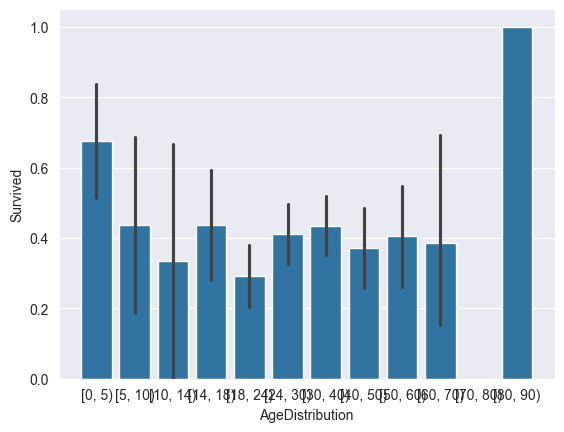

In [169]:
# Show the relevant statistics or visualization(s) to support your answer
bins = [0, 5, 10, 14, 18, 24, 30, 40, 50, 60, 70, 80, 90, 100]
data['AgeDistribution'] = pd.cut(data['Age'], bins=bins, right=False)

sns.barplot(x='AgeDistribution', y='Survived', data=data)
plt.plot()
print('-'*45)
ct = pd.crosstab(data['AgeDistribution'], data['Survived']).rename(columns={0: 'Died', 1: 'Survived'})
print(ct)
print('-'*45)

# Question 4: Does family size somehow affect the survival rate?

Answer: Yes, family size seems to somehow affect the survival rate, with especially families of 2-4 having a higher chance of survival.

Survived    Died  Survived
FamilySize                
1            298       131
2             61        66
3             35        44
4              7        19
5              9         2
6             14         3
7              7         3
8              6         0
11             7         0
---------------------------------------------


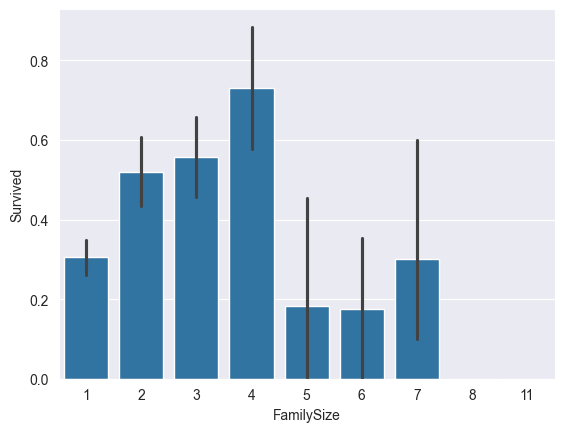

In [170]:
# Show the relevant statistics or visualization(s) to support your answer

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1 # 1 for the pearson himself
sns.barplot(x='FamilySize', y='Survived', data=data)
ct = pd.crosstab(data['FamilySize'], data['Survived']).rename(columns={0: 'Died', 1: 'Survived'})
print(ct)
print('-'*45)

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Passengers with female titles seem in general to have more chance to survive. Mlle, Mme, and Ms all happen to survive, even though the sample is small. And of course titles such as the Countess and Lady must survive as well. But in general there are many more Mrs and Miss who survive than Mr. Even though Masters seem to have a decent survival rate, men in general doesn't have it (except Dr, Col and Major, but sample is small). It is also interesting to see which titles which has zero survival rate. All Rev (Reverend/holy) people typically associating with Christianity died. Maybe they felt a responsibility to sacrifice themselves. And the Captain — of course, Bernard Hill chose to go down with the ship in the movie. As a conclusion, the answer is yes, it does seem that passengers with certain titles have more chance to survive.

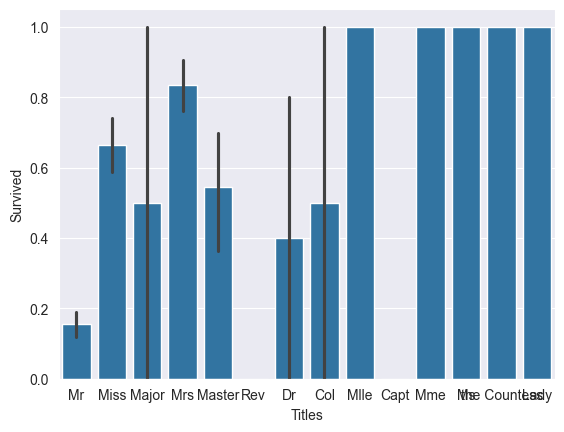

---------------------------------------------
Survived      Died  Survived
Titles                      
Capt             1         0
Col              1         1
Dr               3         2
Lady             0         1
Major            1         1
Master          15        18
Miss            48        95
Mlle             0         2
Mme              0         1
Mr             354        65
Mrs             16        80
Ms               0         1
Rev              5         0
the Countess     0         1
---------------------------------------------


In [171]:
# Show the relevant statistics or visualization(s) to support your answer
data['Titles'] = data["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()

sns.barplot(x='Titles', y='Survived', data=data)
plt.show()

print('-'*45)
ct = pd.crosstab(data['Titles'], data['Survived']).rename(columns={0: 'Died', 1: 'Survived'})
print(ct)
print('-'*45)
